# Extract Data

In [130]:
# Import dependencies
import pandas as pd
import numpy as np
import re

## 8.2.2 Extract Kaggle Data

In [131]:
# read data into DataFrame
kaggle_metadata = pd.read_csv('data/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('data/ratings.csv')


In [132]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [133]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.00,90.00,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.00,1.00
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.00,360.00,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.00,3.00
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.00,90.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.80,6.00
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.00,87.00,[],Released,NaN,Satan Triumphant,False,0.00,0.00
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.00,75.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.00,0.00


In [134]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
42347,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,29896,tt1135933,fr,Never Cry Werewolf,Teenager Loren (Nina Dobrev) doesn't like her ...,...,2008-05-11,0.00,87.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An Immortal Battle for Survival,Never Cry Werewolf,False,5.30,32.00
9344,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,16209,tt0311361,en,Jesus Christ Vampire Hunter,"The first testament says ""an eye for an eye."" ...",...,2001-06-10,0.00,85.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Jesus Christ Vampire Hunter,False,3.90,15.00
25359,False,NaN,0,[],NaN,128555,tt0079735,en,"Poliziotto, solitudine e rabbia","""Poliziotti solitudine e rabbia"" or ""Ein Mann ...",...,1980-01-01,0.00,87.00,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,The Rebel,False,0.00,0.00
25606,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,168408,tt0053800,en,Esther and the King,Recently widowed Persian King Ahasuerus wants ...,...,1960-11-18,0.00,109.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Esther and the King,False,5.50,2.00
38233,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,156326,tt0022235,en,L'opéra de quat'sous,The French-language version of the The Threepe...,...,1931-11-04,0.00,104.00,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,L'opéra de quat'sous,False,6.00,3.00


In [135]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.00,1425941529
1,1,147,4.50,1425942435
2,1,858,5.00,1425941523
3,1,1221,5.00,1425941546
4,1,1246,5.00,1425941556


In [136]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.00,1257031564
26024285,270896,60069,5.00,1257032032
26024286,270896,63082,4.50,1257031764
26024287,270896,64957,4.50,1257033990
26024288,270896,71878,2.00,1257031858


In [137]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
9563696,98680,1080,4.00,1021334591
25568931,266114,1917,3.00,1133992840
4300906,44603,590,3.00,847718380
17087645,177420,2700,4.00,1046936935
8016937,82659,208,3.00,1006215039


## 8.3.12 Clean Kaggle Data

In [138]:
kaggle_metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"


In [139]:
# Investigate movie metadata
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

## Convert data types

### 'adult' column

In [140]:
# Check 'adult' to see if all values are either True or False
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [141]:
# Show rows where 'adult' is not 'True' or 'False'
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,nan,nan,NaN,NaN,NaN,NaN,NaN,nan,nan


In [142]:
# For hackathon, keep only rows where 'adult' is 'False' and drop 'adult' column.  No longer necessary.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

### 'video' column

In [143]:
# Check 'video' to see if all values are either True or False
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [144]:
# Convert 'video' - HELP!
kaggle_metadata ['video'] = kaggle_metadata['video'] == 'True'

In [145]:
kaggle_metadata.head()

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00


In [146]:
kaggle_metadata['video'].value_counts()

False    45454
Name: video, dtype: int64

### Numeric columns:  'budget', 'id', 'popularity'

In [147]:
# Convert columns to numeric using Pandas to_numeric() method.  
# Set errors = 'raise' in case there's any data that cannot be converted to a number.

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

### 'release_date' conversion

In [148]:
# Convert 'release_date' to datetime using pandas
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [149]:
kaggle_metadata.sample(n=5)

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13821,"{'id': 75014, 'name': 'How I Unleashed World W...",0,"[{'id': 10769, 'name': 'Foreign'}, {'id': 28, ...",NaN,75015,NaN,pl,Jak rozpętałem drugą wojnę światową: Cz.3 - Wś...,How I Unleashed World War II tells the story o...,0.20,...,1970-04-06,0.00,73.00,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,How I Unleashed World War II Part III: Among F...,False,7.00,3.00
16485,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,74924,tt0056725,en,Zotz!,"Jonathan Jones, a professor of ancient languag...",0.10,...,1962-10-03,0.00,87.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Zay It, Zee It and Zoon!",Zotz!,False,6.50,2.00
35681,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,178189,tt2415372,en,"Inner Worlds, Outer Worlds",There is one vibratory field that connects all...,0.44,...,2012-12-19,0.00,122.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"Inner Worlds, Outer Worlds",False,5.30,3.00
32337,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,276155,tt0040619,it,Il mulino del Po,NaN,0.04,...,1949-09-28,0.00,96.00,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,The Mill on the Po,False,5.00,1.00
37773,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,75510,tt0023362,en,The Purchase Price,"Barbara Stanwyck plays Joan Gordon, a torch si...",1.09,...,1932-07-23,0.00,68.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She took another woman's place on her wedding ...,The Purchase Price,False,5.30,8.00


## Reasonability Checks on Ratings Data

In [150]:
# List columns
ratings.columns.tolist()

['userId', 'movieId', 'rating', 'timestamp']

In [151]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


### Convert 'timestamp' from unix to date time

In [152]:
ratings['timestamp'].head()

0    1425941529
1    1425942435
2    1425941523
3    1425941546
4    1425941556
Name: timestamp, dtype: int64

In [153]:
# Convert ratings 'timestamp' to date/time with Pandas to_datetime(), origin 'unix', time unit=seconds
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [154]:
# Since dates fall within expected date range, assign to the 'timestamp' column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

### Statistics of ratings

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

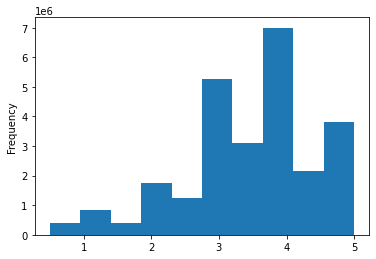

In [155]:
# Look at a histogram (bar chart - shows how often data point shows up in data) 
# of rating distributions and used describe() method to print out stats on central tendency
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

## Export Clean Data

In [156]:
# Export DataFrames to (CSV).

kaggle_metadata.to_csv("Data/clean_kaggle_metatdata.csv")

ratings.to_csv("Data/clean_ratings.csv")